Render this effect for a **square source** and a** single occluder**, casting a
shadow onto an infinite plane. For a fixed geometry, you should find
that as the number of point sources goes up, the quantization error goes down.

This approximation has the unpleasant property that it is possible to produce
arbitrarily large quantization errors with any finite grid, by changing
the geometry. This is because there are configurations of source and
occluder that produce very large penumbrae. Use a square source and a
single occluder casting a shadow onto an infinite plane, to explain this
effect.

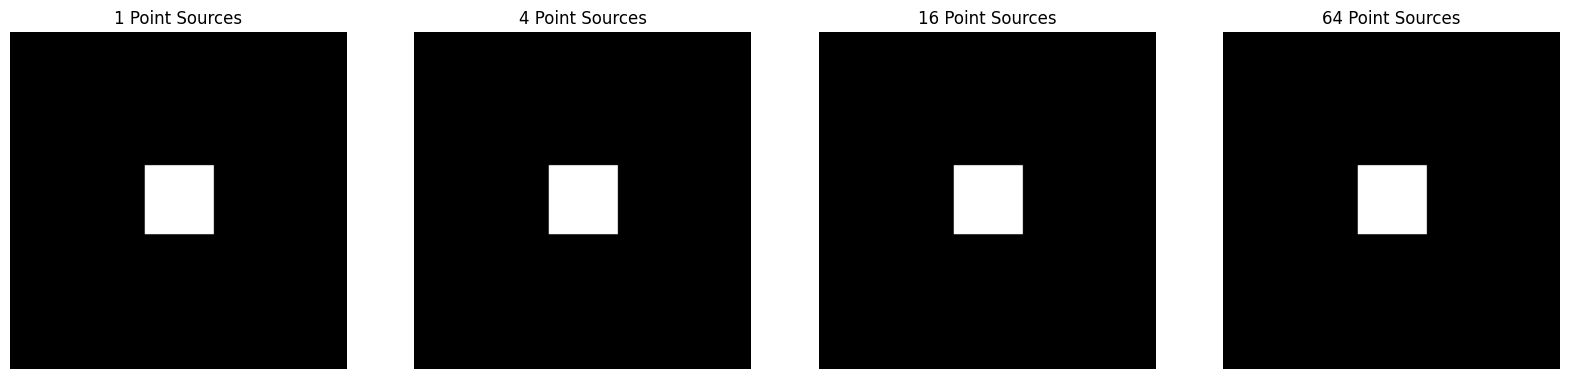

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the shadow intensity on the plane
def compute_shadow_intensity(occluder_center, occluder_size, plane_size, num_point_sources):
    # Initialize the intensity grid for the shadow on the plane
    shadow_intensity = np.zeros((plane_size, plane_size))

    # Calculate the coordinates for each point source in the grid
    source_grid_size = int(np.sqrt(num_point_sources))
    x_sources = np.linspace(-0.5, 0.5, source_grid_size)
    y_sources = np.linspace(-0.5, 0.5, source_grid_size)

    for x_s in x_sources:
        for y_s in y_sources:
            # Offset the source coordinates relative to the occluder center
            source_position = np.array([occluder_center[0] + x_s, occluder_center[1] + y_s])

            # Iterate over each pixel on the plane and compute if it is in shadow
            for i in range(plane_size):
                for j in range(plane_size):
                    plane_point = np.array([i / plane_size - 0.5, j / plane_size - 0.5])
                    # Check if the point is in the shadow of the occluder
                    occluder_bounds = [
                        occluder_center[0] - occluder_size / 2,
                        occluder_center[0] + occluder_size / 2,
                        occluder_center[1] - occluder_size / 2,
                        occluder_center[1] + occluder_size / 2,
                    ]
                    if (
                        occluder_bounds[0] <= plane_point[0] <= occluder_bounds[1]
                        and occluder_bounds[2] <= plane_point[1] <= occluder_bounds[3]
                    ):
                        shadow_intensity[i, j] += 1

    # Normalize the intensity to the range [0, 1]
    shadow_intensity /= num_point_sources
    return shadow_intensity

# Parameters
occluder_center = (0, 0)  # Center of the occluder
occluder_size = 0.2  # Size of the occluder
plane_size = 200  # Resolution of the plane
num_sources_list = [1, 4, 16, 64]  # Different numbers of point sources

# Plotting shadows for different numbers of point sources
fig, axes = plt.subplots(1, len(num_sources_list), figsize=(20, 5))
for idx, num_sources in enumerate(num_sources_list):
    shadow_intensity = compute_shadow_intensity(occluder_center, occluder_size, plane_size, num_sources)
    axes[idx].imshow(shadow_intensity, cmap='gray', origin='lower')
    axes[idx].set_title(f'{num_sources} Point Sources')
    axes[idx].axis('off')

plt.show()


In [ ]:
#Next

Estimated integral for a=0.5: 6.3992
Estimated integral for a=1.0: 6.7225
Estimated integral for a=2.0: 6.1135
Estimated integral for a=3.0: 5.9168


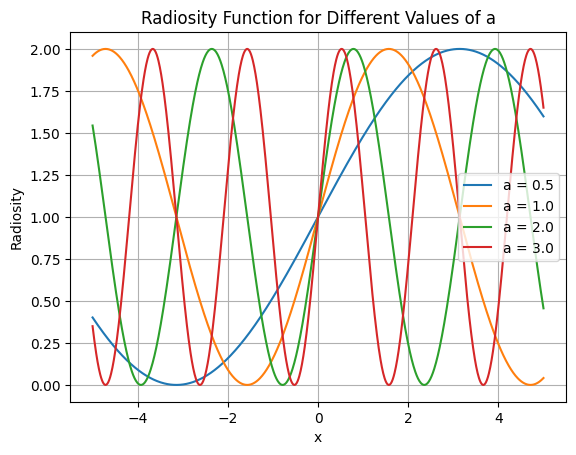

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the radiosity for a given position and parameter 'a'
def radiosity_function(x, a):
    return 1 + np.sin(a * x)

# Monte Carlo Integration with Importance Sampling
def monte_carlo_integration(a, num_samples=10000):
    # Generate random samples for x, y in the infinite plane
    # We use a bounded region for practical purposes and importance sampling
    x_samples = np.random.uniform(-5, 5, num_samples)
    y_samples = np.random.uniform(-5, 5, num_samples)

    # Calculate the value of the radiosity function at these samples
    radiosity_samples = radiosity_function(x_samples, a)

    # Importance sampling: weight samples by the importance function (here uniform in this bounded region)
    importance_weights = np.exp(-0.5 * (x_samples**2 + y_samples**2))  # Gaussian for importance
    weighted_samples = radiosity_samples * importance_weights

    # Estimate the integral as the mean of the weighted samples scaled by the domain size
    integral_estimate = np.mean(weighted_samples) * 100  # Scale factor for bounded region (-5 to 5)

    return integral_estimate

# Parameters
a_values = [0.5, 1.0, 2.0, 3.0]  # Different values of 'a' to test

# Perform Monte Carlo Integration for different values of 'a'
results = {}
for a in a_values:
    integral_value = monte_carlo_integration(a)
    results[a] = integral_value
    print(f"Estimated integral for a={a}: {integral_value:.4f}")

# Plotting the radiosity function for visualization
x_vals = np.linspace(-5, 5, 1000)
for a in a_values:
    plt.plot(x_vals, radiosity_function(x_vals, a), label=f'a = {a}')
plt.title('Radiosity Function for Different Values of a')
plt.xlabel('x')
plt.ylabel('Radiosity')
plt.legend()
plt.grid()
plt.show()


In [ ]:
#Next

In [ ]:
from scipy.linalg import solve

# Form factors for a cube with six surfaces
# Each row represents the form factors from a surface to all surfaces (including itself)
form_factors = np.array([
    [0, 0.25, 0.25, 0.25, 0.25, 0],  # Top surface (source)
    [0.25, 0, 0.25, 0, 0, 0.25],     # Bottom
    [0.25, 0.25, 0, 0.25, 0, 0],     # Front
    [0.25, 0, 0.25, 0, 0.25, 0],     # Back
    [0.25, 0, 0, 0.25, 0, 0.25],     # Left
    [0, 0.25, 0, 0, 0.25, 0.25]      # Right
])

# Reflectivity of each surface (assuming they are the same)
reflectivity = 0.8
rho = np.full(6, reflectivity)

# Emissive power of each surface (only top surface has a source)
E = np.array([100, 0, 0, 0, 0, 0])

# Setup the linear system (I - rho * F) * B = E
I = np.eye(6)  # Identity matrix
A = I - rho[:, None] * form_factors
B = solve(A, E)  # Solve for the radiosities

# Output the results
for i, bi in enumerate(B):
    print(f"Radiosity of surface {i+1}: {bi:.4f}")


Radiosity of surface 1: 132.8125
Radiosity of surface 2: 39.0625
Radiosity of surface 3: 42.9688
Radiosity of surface 4: 42.9688
Radiosity of surface 5: 39.0625
Radiosity of surface 6: 19.5313


In [ ]:
#Next

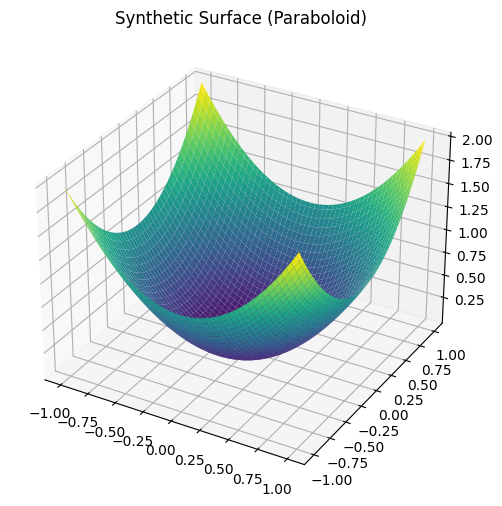

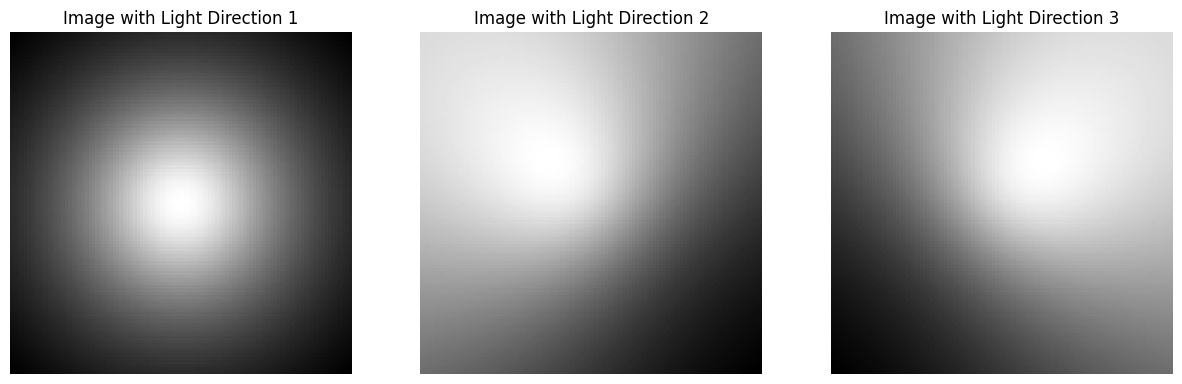

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Setup synthetic data for photometric stereo

# Generate a synthetic surface (e.g., a paraboloid)
height, width = 100, 100
X, Y = np.meshgrid(np.linspace(-1, 1, width), np.linspace(-1, 1, height))
Z = X**2 + Y**2  # Paraboloid surface

# Display the synthetic surface
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
ax.set_title("Synthetic Surface (Paraboloid)")
plt.show()

# Surface normals (gradient of the surface)
normals = np.dstack((-2 * X, -2 * Y, np.ones_like(Z)))
normals /= np.linalg.norm(normals, axis=2, keepdims=True)  # Normalize

# Light directions (three different directions)
light_directions = np.array([
    [0.0, 0.0, 1.0],      # Light coming from above
    [1.0, 1.0, 2.0],      # Light from top-right
    [-1.0, 1.0, 2.0],     # Light from top-left
]) # Define the array with floats
light_directions /= np.linalg.norm(light_directions, axis=1, keepdims=True)

# Create images by calculating dot product between light directions and surface normals
images = np.zeros((height, width, light_directions.shape[0]))
for i, L in enumerate(light_directions):
    images[:, :, i] = np.dot(normals, L)

# Display the synthetic images
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, ax in enumerate(axes):
    ax.imshow(images[:, :, i], cmap='gray')
    ax.set_title(f'Image with Light Direction {i+1}')
    ax.axis('off')
plt.show()


In [ ]:
#ext

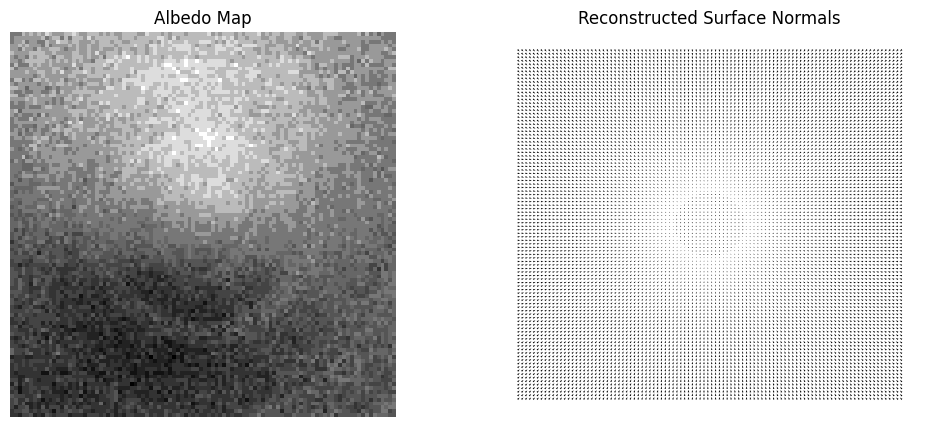

In [ ]:
# Step 2: Calculate surface normals from images

# Reshape image data for linear solving
I = images.reshape(-1, light_directions.shape[0])  # Image intensity matrix
G = np.linalg.pinv(light_directions) @ I.T  # Solve for gradient (using pseudo-inverse)
G = G.T.reshape(height, width, 3)  # Reshape to original size

# Calculate albedo and surface normals
albedo = np.linalg.norm(G, axis=2)
normals_reconstructed = G / np.maximum(albedo[..., None], 1e-6)  # Avoid division by zero

# Display albedo and reconstructed normals
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].imshow(albedo, cmap='gray')
axes[0].set_title('Albedo Map')
axes[0].axis('off')

axes[1].quiver(X, Y, normals_reconstructed[:, :, 0], normals_reconstructed[:, :, 1])
axes[1].set_title('Reconstructed Surface Normals')
axes[1].axis('off')
plt.show()


In [ ]:
#Next

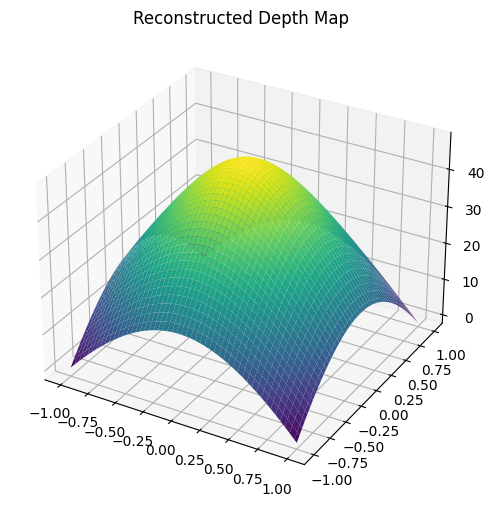

In [ ]:
# Step 3: Depth reconstruction from surface normals

# Initialize depth map
depth_map = np.zeros_like(Z)

# Integrate surface normals along both axes
for i in range(1, height):
    depth_map[i, 0] = depth_map[i-1, 0] + normals_reconstructed[i, 0, 1]  # Integrate along y-axis
for j in range(1, width):
    depth_map[:, j] = depth_map[:, j-1] + normals_reconstructed[:, j, 0]  # Integrate along x-axis

# Display the reconstructed depth map
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, depth_map, cmap='viridis')
ax.set_title("Reconstructed Depth Map")
plt.show()


In [ ]:
# Step 4: Evaluate accuracy and repeatability

# Accuracy: Compute the Mean Squared Error (MSE) between original and reconstructed surface
mse_accuracy = np.mean((depth_map - Z)**2)
print(f"Mean Squared Error (Accuracy): {mse_accuracy:.4f}")

# Repeatability: Create new images with slightly different lighting and reconstruct depth
light_directions_new = np.array([
    [0, 0, 1],      # Light coming from above
    [1.1, 1, 2],    # Slight change in top-right light direction
    [-1.1, 1, 2],   # Slight change in top-left light direction
])
light_directions_new /= np.linalg.norm(light_directions_new, axis=1, keepdims=True)

# Generate new images and reconstruct depth
images_new = np.zeros_like(images)
for i, L in enumerate(light_directions_new):
    images_new[:, :, i] = np.dot(normals, L)

# Reconstruct depth using new images
I_new = images_new.reshape(-1, light_directions_new.shape[0])
G_new = np.linalg.pinv(light_directions_new) @ I_new.T
G_new = G_new.T.reshape(height, width, 3)
normals_reconstructed_new = G_new / np.maximum(np.linalg.norm(G_new, axis=2)[..., None], 1e-6)

# Integrate to find new depth map
depth_map_new = np.zeros_like(Z)
for i in range(1, height):
    depth_map_new[i, 0] = depth_map_new[i-1, 0] + normals_reconstructed_new[i, 0, 1]
for j in range(1, width):
    depth_map_new[:, j] = depth_map_new[:, j-1] + normals_reconstructed_new[:, j, 0]

# Compute the repeatability error
mse_repeatability = np.mean((depth_map - depth_map_new)**2)
print(f"Mean Squared Error (Repeatability): {mse_repeatability:.4f}")


Mean Squared Error (Accuracy): 834.8584
Mean Squared Error (Repeatability): 0.0000
